In [1]:
import pandas as pd

In [2]:
from nsepy import get_history as gh
import datetime as dt

In [3]:
import yfinance as yf

In [4]:
import datetime as dt

start = dt.datetime(2021, 7, 1)
end = dt.datetime(2022, 1, 27)
symbol = 'AXISBANK.NS'  # Stock symbol in uppercase

stk_data = yf.download(symbol, start=start, end=end)

[*********************100%%**********************]  1 of 1 completed


In [5]:
stk_data=stk_data[["Open","High","Low","Close"]]
stk_data
#stk_data.to_csv("Tatacoffee13_21.csv")

,Open,High,Low,Close
Date,,,,
2021-07-01,750.000000,754.400024,744.500000,746.450012
2021-07-02,747.599976,752.849976,744.000000,750.650024
2021-07-05,757.099976,762.000000,753.400024,760.349976
2021-07-06,757.000000,767.000000,755.200012,758.349976
2021-07-07,755.900024,764.000000,752.250000,762.900024
...,...,...,...,...
2022-01-19,725.200012,731.950012,718.700012,729.599976
2022-01-20,731.049988,737.150024,722.150024,728.900024
2022-01-21,722.000000,725.250000,708.049988,712.500000


In [6]:
#column="Close"

In [7]:
from sklearn.preprocessing import MinMaxScaler
Ms = MinMaxScaler()
data1= Ms.fit_transform(stk_data)
print("Len:",data1.shape)

Len: (143, 4)


In [8]:
data1=pd.DataFrame(data1,columns=["Open","High","Low","Close"])

In [9]:
training_size = round(len(data1 ) * 0.80)
print(training_size)
X_train=data1[:training_size]
X_test=data1[training_size:]
print("X_train length:",X_train.shape)
print("X_test length:",X_test.shape)
y_train=data1[:training_size]
y_test=data1[training_size:]
print("y_train length:",y_train.shape)
print("y_test length:",y_test.shape)

114
X_train length: (114, 4)
X_test length: (29, 4)
y_train length: (114, 4)
y_test length: (29, 4)


In [10]:
import warnings
warnings.filterwarnings("ignore")

In [11]:
performance={"Model":[],"RMSE":[],"MaPe":[],"Lag":[],"Test":[]}

In [12]:
def cominbation(dataset,listt):
    print(listt)
    datasetTwo=dataset[listt]
    test_obs = 28
    train =datasetTwo[:-test_obs]
    test = datasetTwo[-test_obs:]
    from statsmodels.tsa.api import VAR
    for i in [1,2,3,4,5,6,7,8,9,10]:
        model = VAR(train)
        results = model.fit(i)
        print('Order =', i)
        print('AIC: ', results.aic)
        print('BIC: ', results.bic)
        print()
    x = model.select_order(maxlags=12)
    order=x.selected_orders["aic"]
    result = model.fit(order)
    #result.summary()
    lagged_Values = train.values[-order:]
    pred = result.forecast(y=lagged_Values,steps=28) 
    pred=pd.DataFrame(pred,columns=listt)
    pred.to_csv("varforecasted_{}.csv".format(test_obs))
    from sklearn.metrics import mean_squared_error
    rmse= round(mean_squared_error(test,pred,squared=False))
    from sklearn.metrics import mean_absolute_percentage_error
    mape=mean_absolute_percentage_error(test,pred)
    performance["Model"].append(listt)
    performance["RMSE"].append(rmse)
    performance["MaPe"].append(mape)
    performance["Lag"].append(order)
    performance["Test"].append(test_obs)
    perf=pd.DataFrame(performance)
    return perf,result,pred

In [13]:
listt=["Close","High","Open","Low"]
#listt=["AQI_calculated","PM10","PM2.5","NOx","NO2","NO","NH3","SO2","CO",'year']


In [14]:
perf,result,pred=cominbation(data1,listt)

['Close', 'High', 'Open', 'Low']
Order = 1
AIC:  -28.07729387912183
BIC:  -27.597259063614022

Order = 2
AIC:  -28.205346860941308
BIC:  -27.33644454701525

Order = 3
AIC:  -28.03995578757879
BIC:  -26.777795597334638

Order = 4
AIC:  -27.852866761525966
BIC:  -26.192974385947238

Order = 5
AIC:  -27.68329024923676
BIC:  -25.621105242631643

Order = 6
AIC:  -27.571034319145937
BIC:  -25.10190782168801

Order = 7
AIC:  -27.472116161730508
BIC:  -24.591308547411902

Order = 8
AIC:  -27.593825360225566
BIC:  -24.296503807431442

Order = 9
AIC:  -27.45885022743059
BIC:  -23.740086209236384

Order = 10
AIC:  -27.329595305452052
BIC:  -23.184361996634586



In [15]:
data1

,Open,High,Low,Close
0,0.508982,0.441549,0.543815,0.491495
1,0.497006,0.433854,0.540997,0.513145
2,0.544411,0.479275,0.593970,0.563144
3,0.543912,0.504095,0.604114,0.552835
4,0.538423,0.489203,0.587489,0.576289
...,...,...,...,...
138,0.385230,0.330107,0.398422,0.404639
139,0.414421,0.355920,0.417864,0.401031
140,0.369261,0.296848,0.338405,0.316495
141,0.334331,0.252916,0.226543,0.275773


In [16]:
perf

,Model,RMSE,MaPe,Lag,Test
0,"[Close, High, Open, Low]",0,1.172438,2,28


In [17]:
pred

,Close,High,Open,Low
0,0.303412,0.261861,0.309766,0.306580
1,0.316798,0.267144,0.317677,0.315185
2,0.325030,0.279749,0.328135,0.333198
3,0.336304,0.289285,0.336164,0.343666
4,0.346447,0.298441,0.346927,0.353639
5,0.354989,0.307777,0.356557,0.364281
6,0.363682,0.316200,0.364899,0.373346
7,0.371949,0.324253,0.373342,0.382018
8,0.379600,0.332058,0.381339,0.390476
9,0.386914,0.339374,0.388777,0.398295


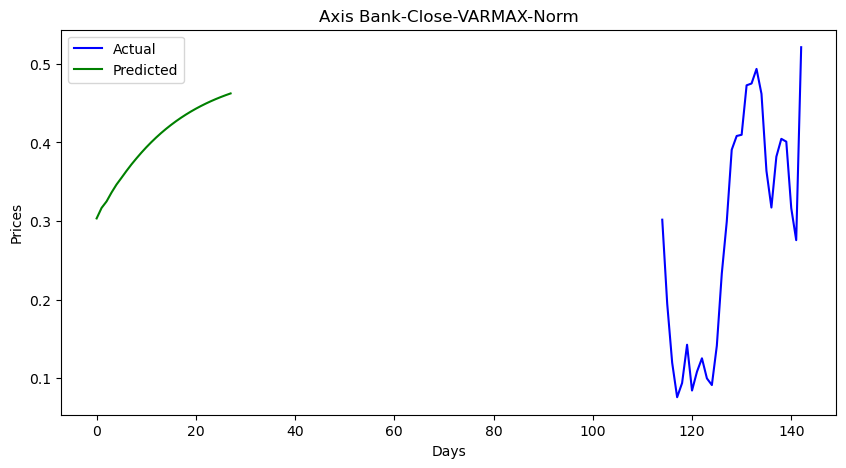

In [18]:
from stockFunctions import graph
graph(y_test["Close"],pred["Close"],"Actual","Predicted","Axis Bank-Close-VARMAX-Norm","Days","Prices")